<a href="https://colab.research.google.com/github/SpiderPork28/Analitica/blob/main/Ac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

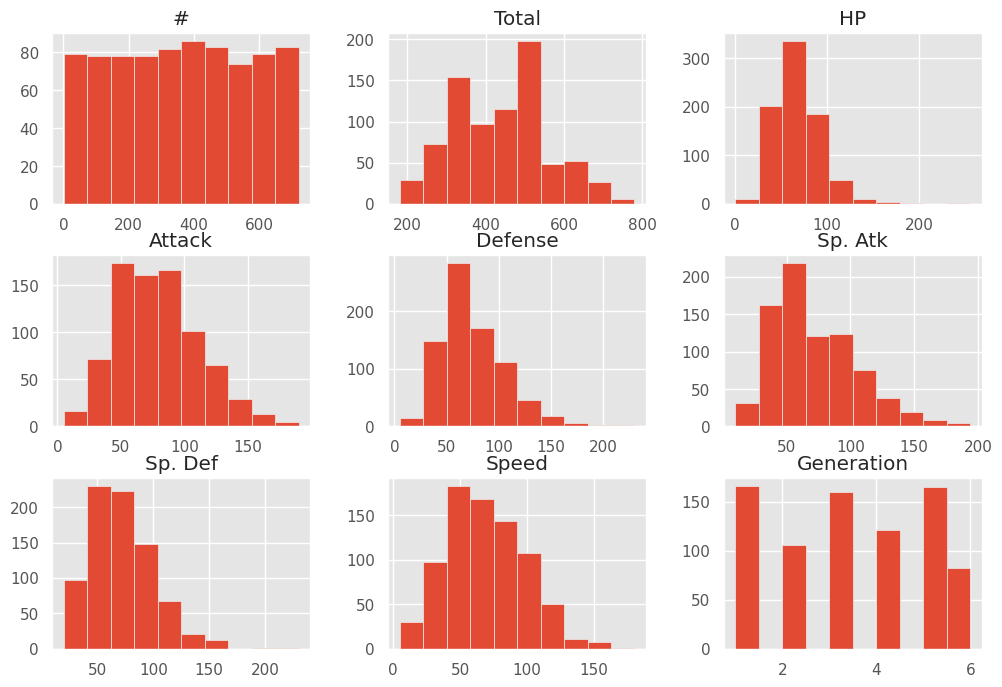

<ipython-input-36-0630643f4e34>:37: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  asignar.append(colores[row])


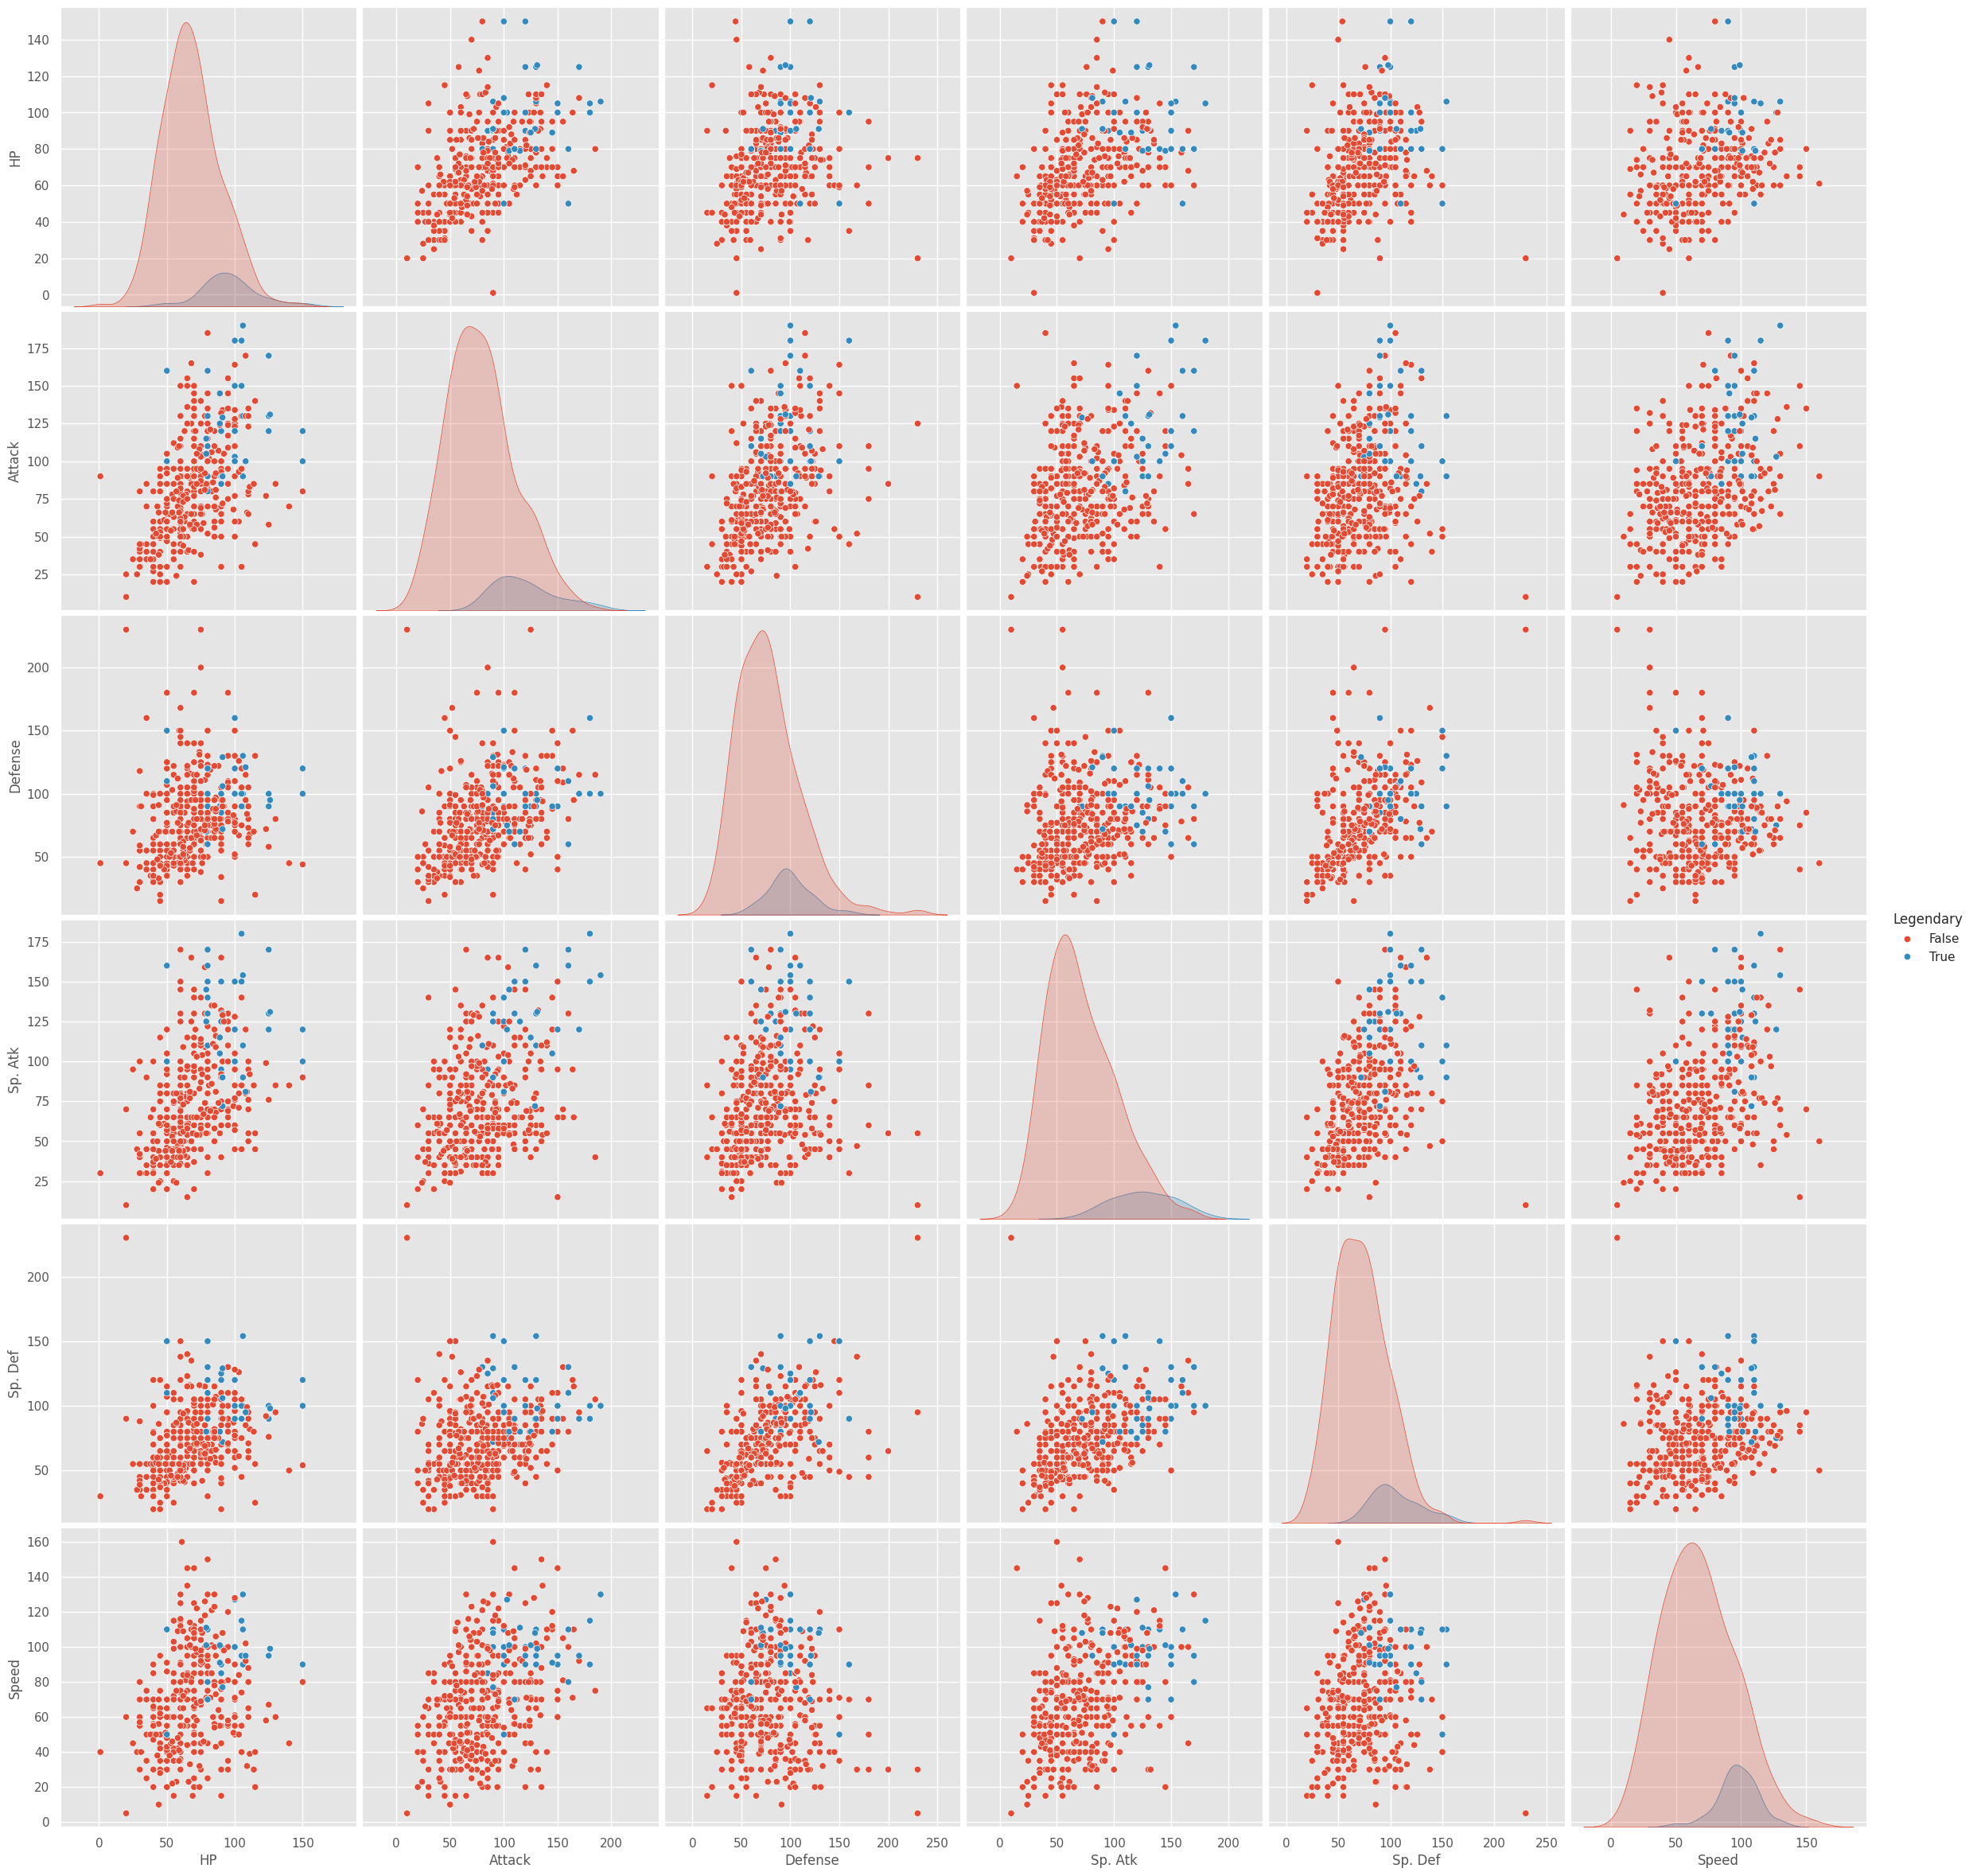

<Figure size 1200x800 with 0 Axes>

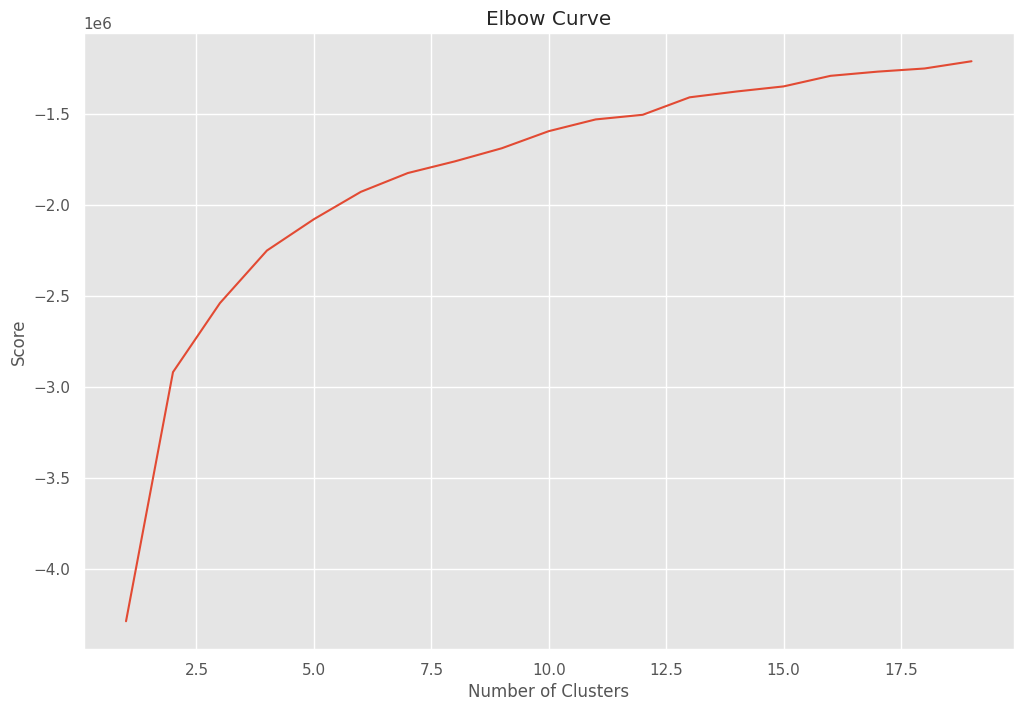


Centroides de los clusters (valores originales):
     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  49.8    53.9     51.8     47.7     48.6   49.3
1  70.3    81.4     63.4     80.6     70.8   93.9
2  90.4   119.5     91.6    121.2     97.1   99.4
3  78.8   107.6    106.1     59.1     71.3   59.8
4  83.0    67.3     91.3     86.1    102.7   53.6


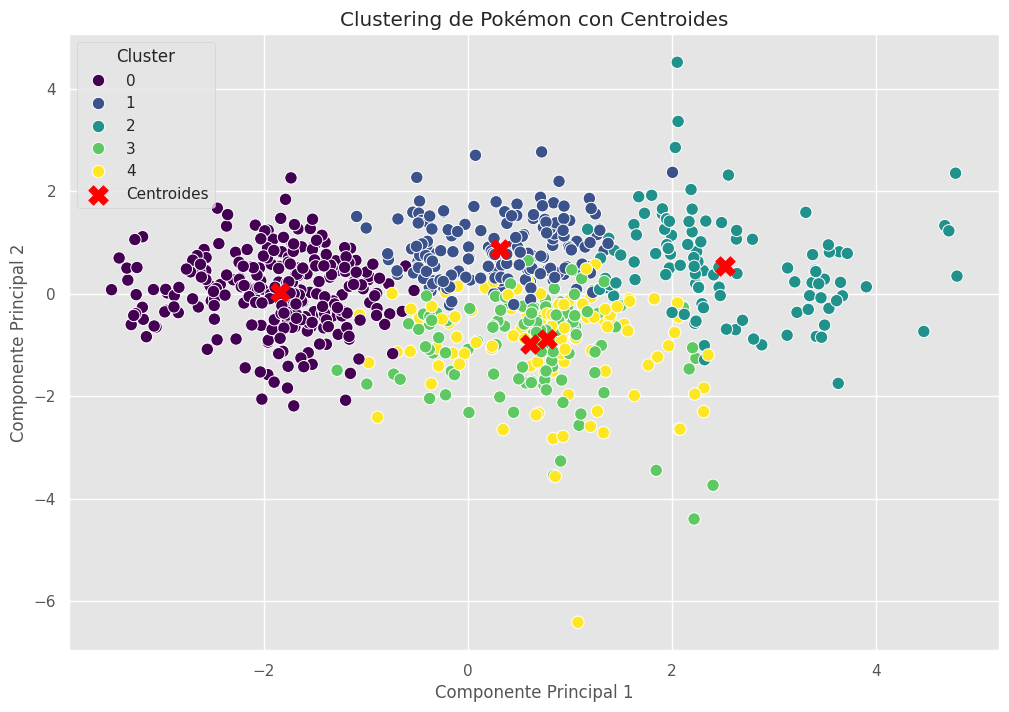


Cluster 0 - Características promedio:
HP         49.764493
Attack     53.902174
Defense    51.786232
Sp. Atk    47.681159
Sp. Def    48.644928
Speed      49.329710

Pokémon representativos:
        Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
395  Snorunt    Ice    NaN  50      50       50       50       50     50

Cluster 1 - Características promedio:
HP         70.296512
Attack     81.360465
Defense    63.430233
Sp. Atk    80.558140
Sp. Def    70.843023
Speed      93.941860

Pokémon representativos:
       Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
642  Swanna  Water  Flying  75      87       63       87       63     98

Cluster 2 - Características promedio:
HP          90.365217
Attack     119.530435
Defense     91.556522
Sp. Atk    121.191304
Sp. Def     97.139130
Speed       99.400000

Pokémon representativos:
          Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
696  Hydreigon   Dark  Dragon  92     105       90   

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Configuración visual
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos
df = pd.read_csv("Pokemon.csv")

# Seleccionar características para clustering
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

df.hist()  # Use df instead of dataframe
plt.show()

X = df[features]

# Correct the pairplot to use valid features and hue
sns.pairplot(df.dropna(), hue='Legendary', height=4, vars=features, kind='scatter')

# Correct the features for clustering
X = np.array(df[features])
y = np.array(df['Legendary'])

# 3D Scatter Plot
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)
plt.show()


# Estandarizar los datos (K-Means es sensible a la escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Elegir k=5 (basado en el método del codo)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Obtener centroides y desestandarizarlos para interpretación
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
print("\nCentroides de los clusters (valores originales):")
print(centroids_df.round(1))

# Añadir clusters al DataFrame
df['Cluster'] = clusters

# Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calcular posición de centroides en espacio PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=80)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker='X',
            s=200, c='red', label='Centroides')
plt.title('Clustering de Pokémon con Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Mostrar 3 Pokémon cercanos a cada centroide
from sklearn.metrics import pairwise_distances_argmin_min

for i in range(k):
    # Encontrar Pokémon más cercanos al centroide
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_[i].reshape(1, -1), X_scaled)
    print(f"\nCluster {i} - Características promedio:")
    print(centroids_df.iloc[i].to_string())
    print("\nPokémon representativos:")
    print(df.iloc[closest][['Name', 'Type 1', 'Type 2'] + features])